In [275]:
# import labraris that i need

import pandas as pd
import requests
import tweepy
import json
import seaborn as sns
import re
import functools as ft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## GATHERING 

In [276]:
#reading the twitter_archive_enhanced.csv file
archive =pd.read_csv("twitter-archive-enhanced.csv")

In [277]:
#desply 
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [278]:

#connecting to URL Programmatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file=url.split("/")[-1]

In [279]:
#downloading the URL
with open("image_predictions.tsv","wb") as f:
    f.write(response.content)

In [280]:
# read the file
image_ = pd.read_csv("image_predictions.tsv", sep='\t')
image_.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### If I got twitter developer account I would use that code through API to get tweets

In [ ]:
'''consumer_key = '**********'
consumer_secret = '**********'
access_token = '**********'
access_secret = '**********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True

exp_tweet = api.get_status(archive.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content.keys()


errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [281]:
list_tweet = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        list_tweet.append({'tweet_id':tweet_id,'retweet_count': retweet_count,'favorite_count':favorite_count })
                       
        
tweet_df = pd.DataFrame(list_tweet)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [282]:
print (f"number of likes :{favorite_count}" )
print (f"number of retweet's :{retweet_count}" )

number of likes :2535
number of retweet's :532


# Assessing

In [283]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [284]:
image_

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [285]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [286]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [287]:
# disply random samples of data
archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
443,819347104292290561,NaN,NaN,2017-01-12 00:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,None,None,None,None
79,877556246731214848,NaN,NaN,2017-06-21 15:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,None,None,None,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None


In [288]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [289]:
sum(archive.duplicated())

0

In [290]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [291]:
archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [292]:
image_ .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality Issues


-issue 1:  we don't need to "in_reply_to_status_id","in_reply_to_user_id"  ,"retweeted_status_id" ,"retweeted_status_user_id"  and  "retweeted_status_timestamp" columns

-issue 2: data tybe for timestamp is a string not a date time 

-issue 3 : data type for" rating_denominator"and " rating_numerator " are an integer not a float 

-issue 4 : data type for " tweet_id " is an integer not a string 

-issue 5 :data type for  " doggo , floofer , pupper , puppo " are a string  

-issue 6 :  Missing — Null — NaN Values in  name column

-issue 7 :source column needed to be clear more

-issue 8 :some of rating_numerator is higher than 12

-issue 9 :some of rating_denominator is higher than 12

-issue 10 :tweet_id column most hav the same data type for each table 



# Tidiness Issues

-issue 1 : merge archive, image_ and tweet_df 

-issue 2  Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that

  
   

# cleaning 

In [324]:
# make a copy for each file
archive_cleen =archive.copy()
image_cleen = image_.copy()
tweet_df_cleen = tweet_df.copy()

In [320]:
archive_cleen.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,"(rating_denominator,)",type_doge
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,10.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,10.0,NaN
13,889638837579907072,2017-07-25 00:10:02+00:00,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,10.0,NaN
16,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,10,Jim,10.0,NaN
20,888078434458587136,2017-07-20 16:49:33+00:00,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,10.0,NaN


In [321]:
image_cleen.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [323]:
tweet_df_cleen.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Cleaning qualty issues 

Define: 
drop all columns that we do not need it 

In [297]:

# Dropping the retweets 
retweet =archive_cleen.retweeted_status_id.notnull()
archive_cleen[retweet]
archive_cleen= archive_cleen[~retweet]

In [298]:
#code 
archive_cleen.drop('in_reply_to_status_id', inplace=True, axis=1)
archive_cleen.drop('in_reply_to_user_id', inplace=True, axis=1)
archive_cleen.drop('retweeted_status_id', inplace=True, axis=1)
archive_cleen.drop('retweeted_status_user_id', inplace=True, axis=1)
archive_cleen.drop('retweeted_status_timestamp', inplace=True, axis=1)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3724673352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.drop('in_reply_to_status_id', inplace=True, axis=1)
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3724673352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.drop('in_reply_to_user_id', inplace=True, axis=1)
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3724673352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [299]:
#test 
archive_cleen.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Define : 
    convert data tybe for timestamp to data time 

In [300]:
#code
archive_cleen['timestamp'] = pd.to_datetime(archive_cleen['timestamp'])

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1900096406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen['timestamp'] = pd.to_datetime(archive_cleen['timestamp'])


In [301]:
# test 
archive_cleen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

Define :
    convert data type for " rating_denominator" and "rating_numerator" to float

In [325]:
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


archive_cleen['pattern'] = archive_cleen['text'].apply(get_pattern)
archive_cleen['fraction'] = archive_cleen['rating_numerator'].astype(str) + '/' + archive_cleen['rating_denominator'].astype(str)
archive_cleen[archive_cleen['pattern'] != archive_cleen['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


In [326]:
# code
archive_cleen["rating_denominator", ] = archive_cleen["rating_denominator"] .astype(float)
archive_cleen["rating_numerator"] = archive_cleen["rating_numerator"] .astype(float)

In [327]:
# test
archive_cleen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Define :
tweet_id column most hav the same data set for each table and most be a string 

In [304]:
# code
archive_cleen["tweet_id"] = archive_cleen["tweet_id"] .astype(str)
image_cleen ["tweet_id"] = image_cleen ["tweet_id"] .astype(str)
tweet_df_cleen["tweet_id"] = tweet_df_cleen ["tweet_id"] .astype(str)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\2143348315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen["tweet_id"] = archive_cleen["tweet_id"] .astype(str)


In [305]:
# test
archive_cleen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   timestamp              2175 non-null   datetime64[ns, UTC]
 2   source                 2175 non-null   object             
 3   text                   2175 non-null   object             
 4   expanded_urls          2117 non-null   object             
 5   rating_numerator       2175 non-null   float64            
 6   rating_denominator     2175 non-null   int64              
 7   name                   2175 non-null   object             
 8   doggo                  2175 non-null   object             
 9   floofer                2175 non-null   object             
 10  pupper                 2175 non-null   object             
 11  puppo                  2175 non-null   object           

Define :
    convert data type for doggo , floofer , pupper , puppo to category 

In [306]:

# code :
archive_cleen.doggo = archive_cleen.doggo.astype('category')
archive_cleen.floofer = archive_cleen.floofer.astype('category')
archive_cleen.pupper = archive_cleen.pupper.astype('category')
archive_cleen.puppo = archive_cleen.puppo.astype('category')


C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3347521036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.doggo = archive_cleen.doggo.astype('category')
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3347521036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.floofer = archive_cleen.floofer.astype('category')
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\3347521036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [307]:
#test:
archive_cleen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   timestamp              2175 non-null   datetime64[ns, UTC]
 2   source                 2175 non-null   object             
 3   text                   2175 non-null   object             
 4   expanded_urls          2117 non-null   object             
 5   rating_numerator       2175 non-null   float64            
 6   rating_denominator     2175 non-null   int64              
 7   name                   2175 non-null   object             
 8   doggo                  2175 non-null   category           
 9   floofer                2175 non-null   category           
 10  pupper                 2175 non-null   category           
 11  puppo                  2175 non-null   category         

define :replace non with nan

In [308]:
#code
archive_cleen.name.replace('None', np.nan, inplace = True)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1546603403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.name.replace('None', np.nan, inplace = True)


In [309]:
#test:
archive_cleen

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,"(rating_denominator,)"
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,10.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,10.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,10.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,10.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,None,None,None,None,10.0
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,None,None,None,None,10.0
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,None,None,None,None,10.0
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,None,None,None,None,10.0


 clear source column

In [310]:
#code
archive_cleen.source = archive_cleen.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\906800215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.source = archive_cleen.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])


In [311]:
#test
archive_cleen

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,"(rating_denominator,)"
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,10.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,10.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,10.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,10.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,None,None,None,None,10.0
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,None,None,None,None,10.0
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,None,None,None,None,10.0
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,None,None,None,None,10.0


defiene :drob rating_denominator is higher than 12

In [312]:
#code
archive_cleen.drop(archive_cleen[archive_cleen['rating_denominator'] > 12].index,inplace=True)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1989744443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.drop(archive_cleen[archive_cleen['rating_denominator'] > 12].index,inplace=True)


In [313]:
#test
sum(archive_cleen['rating_denominator']>15)

0

defiene :drob rating_denominator is higher than 12

In [314]:
#coe
archive_cleen.drop(archive_cleen[archive_cleen['rating_numerator'] > 12].index,inplace=True)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\2375964470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.drop(archive_cleen[archive_cleen['rating_numerator'] > 12].index,inplace=True)


In [315]:
#test
sum(archive_cleen['rating_numerator']>15)

0

define: merge "doggo	,floofer, pupper , puppo" in one column

In [316]:
# code :
archive_cleen.doggo = archive_cleen.doggo.astype('category')
archive_cleen.floofer = archive_cleen.floofer.astype('category')
archive_cleen.pupper = archive_cleen.pupper.astype('category')
archive_cleen.puppo = archive_cleen.puppo.astype('category')

archive_cleen['type_doge']=archive_cleen['text'].str.extract('(doggo|floofer|pupper|puppo)')
archive_cleen = archive_cleen.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1876408751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.doggo = archive_cleen.doggo.astype('category')
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1876408751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_cleen.floofer = archive_cleen.floofer.astype('category')
C:\Users\bussma\AppData\Local\Temp\ipykernel_17548\1876408751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [317]:
#test
archive_cleen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 2 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1796 non-null   object             
 1   timestamp              1796 non-null   datetime64[ns, UTC]
 2   source                 1796 non-null   object             
 3   text                   1796 non-null   object             
 4   expanded_urls          1762 non-null   object             
 5   rating_numerator       1796 non-null   float64            
 6   rating_denominator     1796 non-null   int64              
 7   name                   1277 non-null   object             
 8   (rating_denominator,)  1796 non-null   float64            
 9   type_doge              288 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 154.3+ KB


# Cleening tidiness issues 

define : Restructuring dataset

In [264]:

# code
rename_columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_cleen.columns = rename_columns




In [265]:
restra = pd.wide_to_long(image_cleen, stubnames=['prediction', 'confidence', 'breed'], 
      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [266]:
image_cleen=restra
image_cleen=image_cleen.groupby(['tweet_id'],as_index=False).mean()

In [267]:
#test
image_cleen

,tweet_id,img_num,prediction_level,confidence,breed
0,666020888022790149,1.0,2.0,0.227722,1.000000
1,666029285002620928,1.0,2.0,0.217676,1.000000
2,666033412701032449,1.0,2.0,0.283747,1.000000
3,666044226329800704,1.0,2.0,0.330527,1.000000
4,666049248165822465,1.0,2.0,0.319541,1.000000
...,...,...,...,...,...
2070,891327558926688256,2.0,2.0,0.318900,1.000000
2071,891689557279858688,1.0,2.0,0.126400,0.333333
2072,891815181378084864,1.0,2.0,0.275215,1.000000
2073,892177421306343426,1.0,2.0,0.161061,1.000000


define :merge archive, image_ and tweet_df 

In [198]:
#code
left = [archive_cleen,image_cleen, tweet_df_cleen]
new_Table= ft.reduce(lambda left,right:pd.merge(left,right,on='tweet_id'),left)

In [175]:
#test:
new_Table

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,"(rating_denominator,)",type_doge,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,10.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,10.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
2,889638837579907072,2017-07-25 00:10:02+00:00,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,10.0,NaN,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735,27672
3,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,10,Jim,10.0,NaN,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,4709,29611
4,888078434458587136,2017-07-20 16:49:33+00:00,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,10.0,NaN,...,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,3653,22201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,10.0,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1674,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,10.0,NaN,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1675,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,10.0,NaN,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1676,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,10.0,NaN,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


# Storing Data

In [176]:
new_Table.to_csv("twitter_archive_master.csv", index=False)
pd.read_csv('twitter_archive_master.csv')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,"('rating_denominator',)",type_doge,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,10.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,10.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
2,889638837579907072,2017-07-25 00:10:02+00:00,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,10.0,NaN,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735,27672
3,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,10,Jim,10.0,NaN,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,4709,29611
4,888078434458587136,2017-07-20 16:49:33+00:00,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,10.0,NaN,...,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,3653,22201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,10.0,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1674,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,10.0,NaN,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1675,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,10.0,NaN,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1676,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,10.0,NaN,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


# Analyzing and Visualizing Data

In [177]:
new_Table

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,"(rating_denominator,)",type_doge,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,10.0,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
1,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,10.0,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
2,889638837579907072,2017-07-25 00:10:02+00:00,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,10.0,NaN,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735,27672
3,888917238123831296,2017-07-23 00:22:39+00:00,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,10,Jim,10.0,NaN,...,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,4709,29611
4,888078434458587136,2017-07-20 16:49:33+00:00,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,10.0,NaN,...,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,3653,22201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,10.0,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1674,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,10.0,NaN,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1675,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,10.0,NaN,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1676,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,10.0,NaN,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


top 5 tweet's has retweets

<AxesSubplot:xlabel='tweet_id', ylabel='retweet_count'>

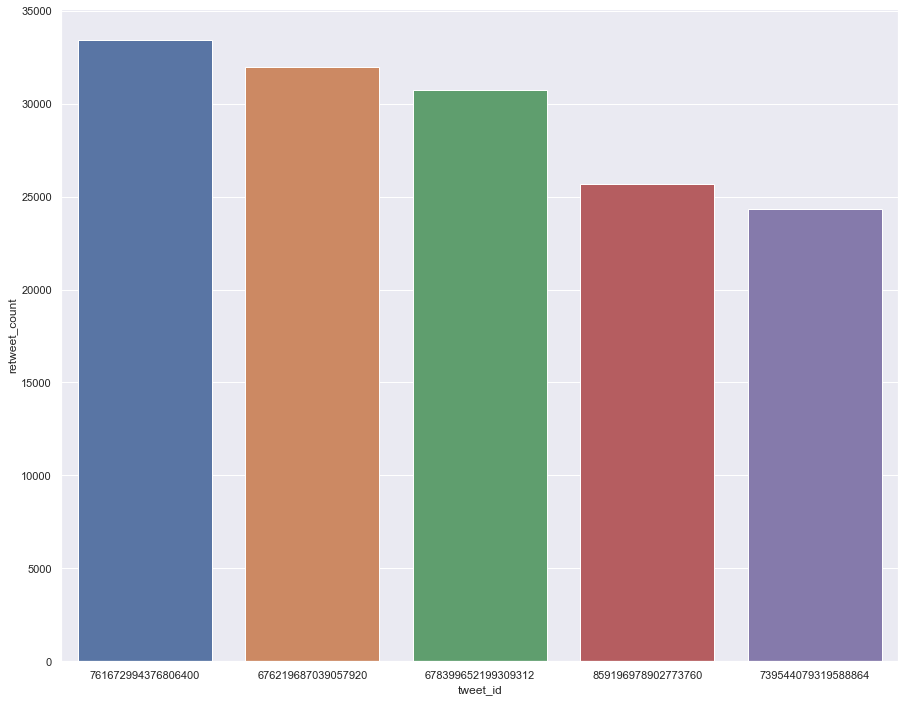

In [182]:
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x='tweet_id',y='retweet_count', data=new_Table.nlargest(5,'retweet_count'))


top 5 tweet's has likes 

<AxesSubplot:xlabel='tweet_id', ylabel='favorite_count'>

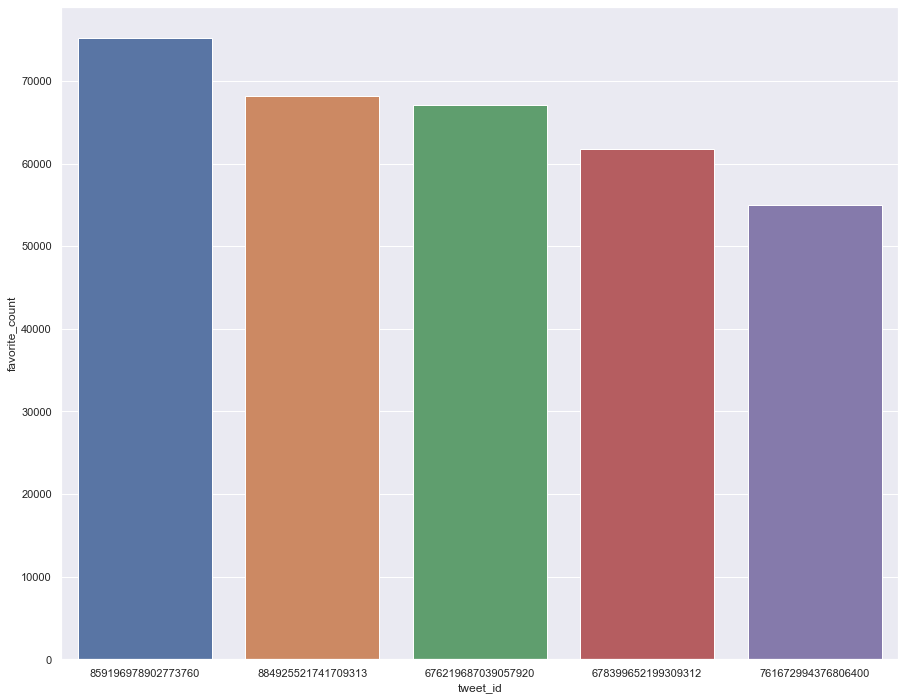

In [183]:
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x='tweet_id',y='favorite_count', data=new_Table.nlargest(5,'favorite_count'))


The most popular types of dogs from high to low

C:\Users\bussma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type_doge', ylabel='count'>

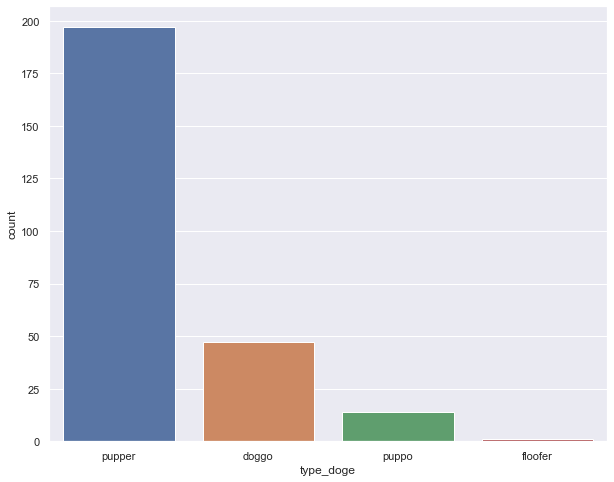

In [184]:
plt.figure(figsize=(10,8))
sns.countplot(new_Table.type_doge,order=new_Table['type_doge'].value_counts().index)

The relationship between Retweets &Favorites

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

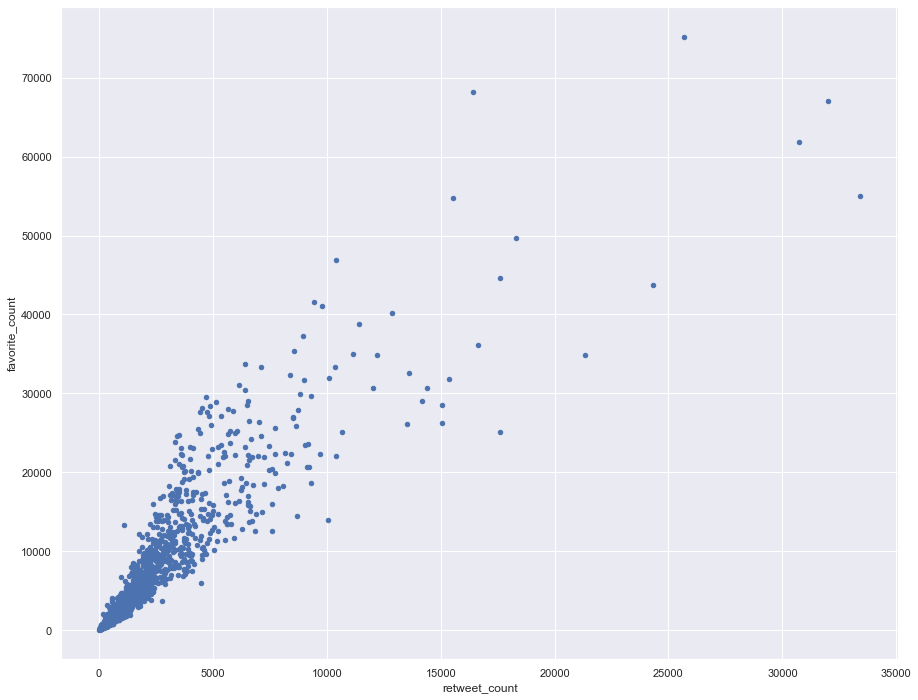

In [185]:
new_Table.plot(x='retweet_count', y='favorite_count', kind='scatter')
